<a href="https://colab.research.google.com/github/TomasMendozaHN/ICDF_Class/blob/main/CorrelationMatrix_ConfusionMatrix_FeatureDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [168]:
!mkdir ~/.kaggle #mkdir = make directory
!cp kaggle.json ~/.kaggle/  # cp = copy
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download titanic

mkdir: cannot create directory ‘/root/.kaggle’: File exists
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [169]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


In [170]:
import pandas as pd
trainData = pd.read_csv("train.csv")
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
# Fill NaN values with 0
trainData = trainData.fillna(0)

# Drop useless data
trainData = trainData.drop(['Name', 'Ticket'], axis='columns')

In [172]:
trainData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,0,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,0,S


# Visualize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88b40f1d50>,
      dtype=object)

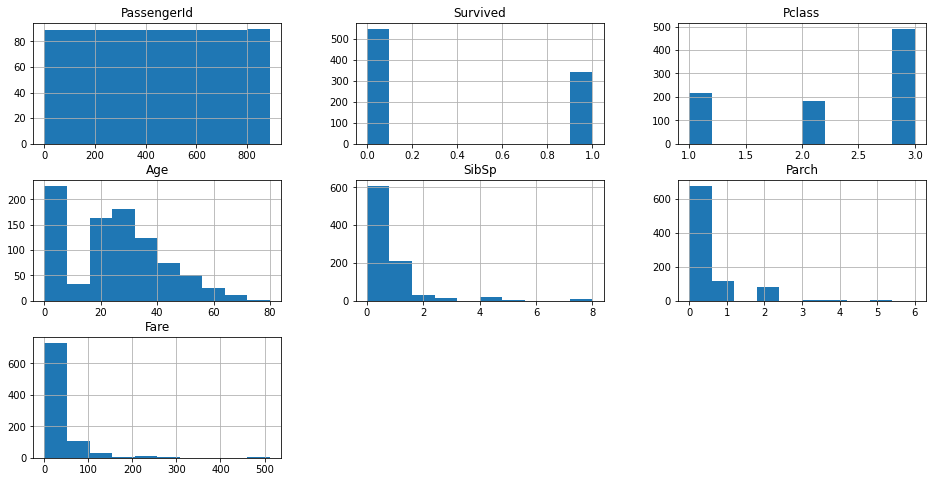

In [173]:
trainData.hist(figsize=(16,8))

Survived
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

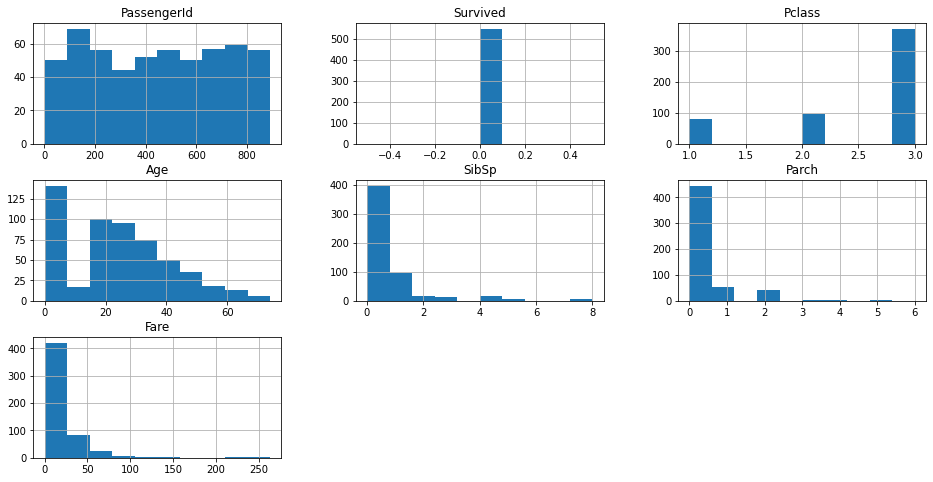

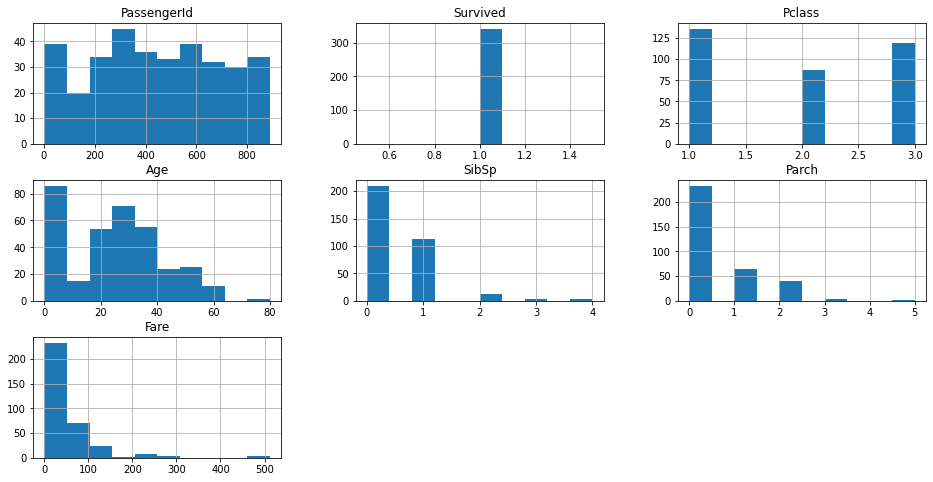

In [174]:
trainData.groupby('Survived').hist(figsize=(16,8))

# Visualize Correlations

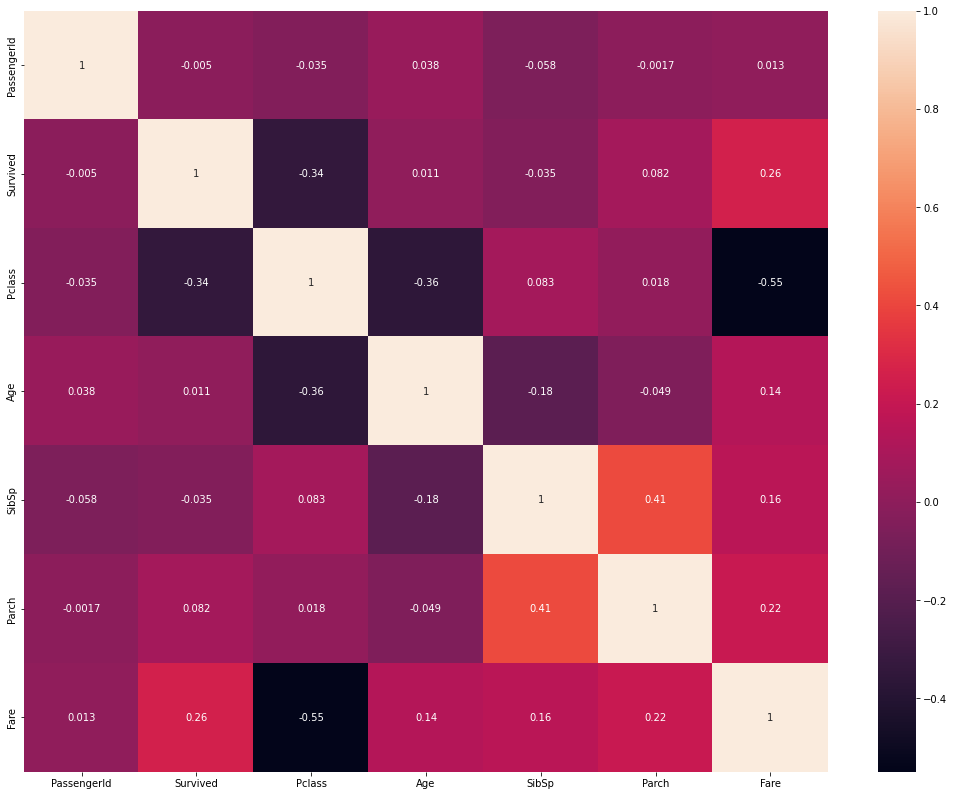

In [175]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(18,14)
import seaborn as sns
corrMatrix = trainData.corr()
sns.heatmap(corrMatrix, annot=True)

plt.show()

# Convert Numerical to Categorical

In [176]:
trainData = pd.get_dummies(trainData)
trainData.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_0,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [177]:
trainY = trainData['Survived']
trainX = trainData.drop(['Survived'], axis='columns')
trainX, trainY

(     PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
 0              1       3  22.0      1      0   7.2500           0         1   
 1              2       1  38.0      1      0  71.2833           1         0   
 2              3       3  26.0      0      0   7.9250           1         0   
 3              4       1  35.0      1      0  53.1000           1         0   
 4              5       3  35.0      0      0   8.0500           0         1   
 ..           ...     ...   ...    ...    ...      ...         ...       ...   
 886          887       2  27.0      0      0  13.0000           0         1   
 887          888       1  19.0      0      0  30.0000           1         0   
 888          889       3   0.0      1      2  23.4500           1         0   
 889          890       1  26.0      0      0  30.0000           0         1   
 890          891       3  32.0      0      0   7.7500           0         1   
 
      Cabin_0  Cabin_A10  ...  Cabin_F

In [178]:
# Convert dataframes to numpy arrays
import numpy as np
trainX, trainY = np.array(trainX), np.array(trainY)
trainX.shape, trainY.shape

((891, 160), (891,))

In [179]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY, random_state=0)

In [180]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.30, random_state=42)
trainX.shape, testX.shape

((623, 160), (268, 160))

# Define MLP model

In [181]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.nn import LogSoftmax

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_fc = nn.Linear(input_dim, 128)
        self.hidden_fc = nn.Linear(128, 128)
        self.hidden_fc2 = nn.Linear(128, 128)
        self.hidden_fc3 = nn.Linear(128, 128)
        self.hidden_fc4 = nn.Linear(128, 128)
        self.hidden_fc5 = nn.Linear(128, 128)
        self.output_fc6 = nn.Linear(128, output_dim)

    def forward(self, x):
        h_1 = F.relu(self.input_fc(x))
        h_2 = F.relu(self.hidden_fc(h_1))
        h_3 = F.relu(self.hidden_fc2(h_2))
        h_4 = F.relu(self.hidden_fc3(h_3))
        h_5 = F.relu(self.hidden_fc4(h_4))
        h_6 = F.relu(self.hidden_fc5(h_5))
        y_pred = self.output_fc6(h_6)
        return y_pred

In [182]:
net = MLP(160,2)

In [183]:
import torch.optim as optim
# initialize our optimizer and loss function
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

In [184]:
import tqdm

hist_loss = []

for epoch in tqdm.tqdm(range(2000)):

  optimizer.zero_grad()

  X = torch.from_numpy(trainX).type(torch.FloatTensor)
  Y = torch.from_numpy(trainY).type(torch.LongTensor)

  outputs = net(X)

  loss = loss_function(outputs, Y)

  loss.backward()

  optimizer.step()

  hist_loss.append(loss.detach().cpu().numpy())



100%|██████████| 1000/1000 [00:12<00:00, 77.16it/s]


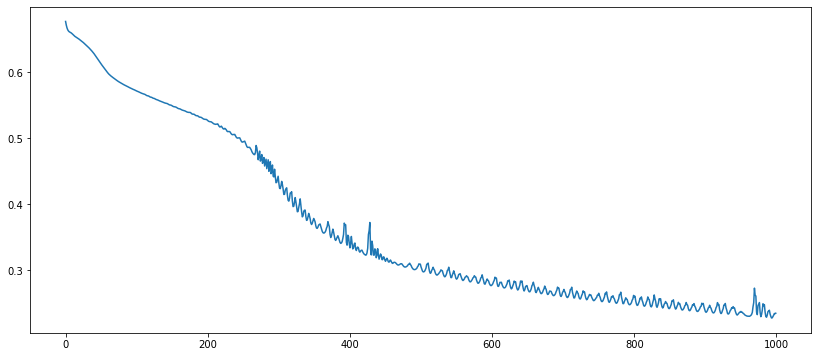

In [185]:
plt.rcParams['figure.figsize'] = (14,6)
plt.plot(hist_loss)
plt.show()

# Test!

In [186]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [219]:
net.eval()

X = torch.from_numpy(testX).type(torch.FloatTensor)
Y = torch.from_numpy(testY).type(torch.LongTensor)

y_pred = net(X)

probs = F.softmax(y_pred, dim=-1)
pred_labels = torch.argmax(probs, 1).detach().numpy()

loss = loss_function(y_pred, Y)

acc = calculate_accuracy(y_pred, Y)
acc = float(acc.detach().numpy())
print(f"The accuracy of your model is = {round(acc,4)*100}%")

The accuracy of your model is = 72.76%


# Correlation Matrix

In [261]:
from sklearn import metrics

def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

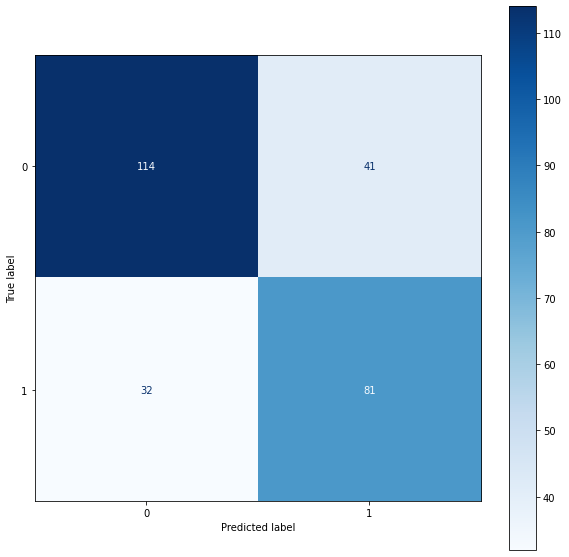

In [262]:
plot_confusion_matrix(testY, pred_labels)